# ELO Calculations Accuracy Scoring on 2020 Europeans

#### Final Step: Score ELO Calculations on Entire Tournament Match Ups

In [54]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Import Brackets Dataset with Winners and Losers

In [222]:
df = pd.read_csv('Elo 2020 Europeans Black Belt Male Brackets.csv', 
                 usecols=['Weight','Gym','Rank','Fighter','Loser','Opponent','Opponent Rank',
                          'Opponent Gym','Tournament','Fight Number',])
df = (df[df.Opponent != 'BYE' ]) #remove bye matches
display(df.head(5))
display(df.shape)

,Fight Number,Fighter,Gym,Loser,Opponent,Opponent Gym,Opponent Rank,Rank,Weight,Tournament
53,1,Patrick Pontes Moura Santos Gaudio,GF Team,Felipe Figueiredo Mauricio,Felipe Figueiredo Mauricio,Icon Jiu-Jitsu Team,25,7,Open Class,European IBJJF Jiu-Jitsu Championship 2020
54,1,Jackson Sousa dos Santos,CheckMat,Jackson Sousa dos Santos,Fellipe Ubaiz Trovo,Gracie Barra,18,10,Open Class,European IBJJF Jiu-Jitsu Championship 2020
55,1,Michael Musumeci Jr.,Brasa CTA,Jacopo Pasquini,Jacopo Pasquini,MatSide Jiu Jitsu,26,6,Open Class,European IBJJF Jiu-Jitsu Championship 2020
56,1,Pedro Henrique de Lima Elias,Ns Brotherhood,Pedro Henrique de Lima Elias,Matheus Felipe da Silva Xavier,Qatar BJJ Brasil,27,8,Open Class,European IBJJF Jiu-Jitsu Championship 2020
57,1,Juan Lopes da Silva,Carlson Gracie Team,Juan Lopes da Silva,Koji Shibamoto,Tri-Force Jiu-Jitsu Academy,4,6,Rooster,European IBJJF Jiu-Jitsu Championship 2020


(137, 10)

In [266]:
df_all = pd.read_csv('Elo 2020 Europeans Black Belt Male Brackets ALL.csv')
df_all = (df_all[df_all.Opponent != 'BYE' ]) #remove bye matches
df_all = df_all[['Weight','Bracket Title','Rank','Fighter','Loser','Opponent','Opponent Rank',
                          'Tournament',]]
display(df_all.head(5))
display(df_all.shape)

,Weight,Bracket Title,Rank,Fighter,Loser,Opponent,Opponent Rank,Tournament
53,Open Class,Bracket 1/2,6.0,Michael Musumeci Jr.,Jacopo Pasquini,Jacopo Pasquini,26,European IBJJF Jiu-Jitsu Championship 2020
54,Open Class,Bracket 1/2,26.0,Jacopo Pasquini,Jacopo Pasquini,Michael Musumeci Jr.,6,European IBJJF Jiu-Jitsu Championship 2020
55,Open Class,Bracket 2/2,7.0,Patrick Pontes Moura Santos Gaudio,Felipe Figueiredo Mauricio,Felipe Figueiredo Mauricio,25,European IBJJF Jiu-Jitsu Championship 2020
56,Open Class,Bracket 2/2,25.0,Felipe Figueiredo Mauricio,Felipe Figueiredo Mauricio,Patrick Pontes Moura Santos Gaudio,7,European IBJJF Jiu-Jitsu Championship 2020
57,Open Class,Bracket 2/2,10.0,Jackson Sousa dos Santos,Jackson Sousa dos Santos,Fellipe Ubaiz Trovo,18,European IBJJF Jiu-Jitsu Championship 2020


(274, 8)

#### Import ELO Ratings

In [3]:
df2 = pd.read_csv('custom_weight_2.csv') # final version with seasonal weighting
df2.drop(columns=['Unnamed: 0'], inplace=True)
df2.dropna(inplace=True)
display(df2.head(5))
display(df2.tail(5))
display(df2.shape)

,fighter,rating,weight
0,R. Evangelista,1617.526992,ultra_heavy
1,Joao Rocha,1601.315465,ultra_heavy
2,Eduardo Lopes,1574.720426,ultra_heavy
3,Victor Hugo,1560.821159,ultra_heavy
4,Kaynan Duarte,1548.223339,ultra_heavy


,fighter,rating,weight
4838,Francisco Iturralde,1464.919629,ABS
4839,Henrique Cardoso,1458.267249,ABS
4840,Felipe Linhares,1457.996230,ABS
4841,David Garmo,1450.360901,ABS
4843,Vinicius Garcia,1432.145786,ABS


(4835, 3)

In [27]:
df1 = pd.read_csv('p4p_2.csv') # this is the final version - has seasonal weighting
df1.drop(columns=['Unnamed: 0'], inplace=True)
print(df1.shape)
df1[:11] 

(3286, 2)


,fighter,rating
0,Kaynan Duarte,1851.228213
1,Fellipe Andrew,1736.980537
2,Gustavo Batista,1734.576938
3,Isaac Doederlein,1728.230208
4,Adam Wardzinski,1724.221663
5,Paulo Miyao,1720.123862
6,Gabriel Sousa,1718.826049
7,Nicholas Meregali,1710.300602
8,Rudson Mateus,1693.585118
9,Hiago George,1688.057390


In [286]:
len(df2.fighter.unique())

3200

In [89]:
list(df.Fighter.unique())

['Patrick Pontes Moura Santos Gaudio',
 'Jackson Sousa dos Santos',
 'Michael Musumeci Jr.',
 'Pedro Henrique de Lima Elias',
 'Juan Lopes da Silva',
 'Nobuhiro Sawada',
 'Bruno Filipe Santos Lima',
 'Bruno da Silva Malfacine',
 'Rafael Vasconcelos de Lima',
 'Bradley  Hill',
 'Diego Oliveira Batista',
 'Guilherme Guimaraes Borges Olimpio da Rocha',
 'Rene Eduardo Lopez',
 'Santeri Lilius',
 'Seif-Eddine Houmine',
 'Israel de Sousa Almeida',
 'Guilherme Afonso Freire Themudo Jardim',
 'Fellipe Ubaiz Trovo',
 'Guthierry Barbosa Nascimento Conceição',
 'Matheus Felipe da Silva Xavier',
 'Deandre Villarama Corbe',
 'Igor Ribeiro Marques',
 'Gabriel Arantes Volante',
 'Lucas Ramos Gonçalves',
 'Gabriel Marangoni de Oliveira',
 'Jakub Zajkowski',
 'Italo Moura de Azevedo',
 'Hiago George Santos Silva',
 'Jeremy S. Jackson',
 'Léon Taffa Loic Larman',
 'Koji Shibamoto',
 'Tomoyuki Hashimoto',
 'Igor Gregório Schneider',
 'Carlos Alberto Oliveira da Silva',
 'Jose Mathias Macedo de Lira Luna'

In [209]:
list(df.Opponent.unique())

['Felipe Figueiredo Mauricio',
 'Fellipe Ubaiz Trovo',
 'Jacopo Pasquini',
 'Matheus Felipe da Silva Xavier',
 'Koji Shibamoto',
 'Tomoyuki Hashimoto',
 'Jose Mathias Macedo de Lira Luna',
 'Thalison Vitorino Soares',
 'Rodrigo Benedito Caporal',
 'Igor Ribeiro Marques',
 'Pedro Paulo Dias Clementino',
 'Isaac Doederlein',
 'Carlos Alberto Oliveira da Silva',
 'Thomas Julien Trintignac',
 'Lukasz Gustaw Michalec',
 'Alexssandro Pinto Sodré',
 'Jakub Zajkowski',
 'Suraj Kumar Budhram',
 'Manuel Ribamar V. de Oliveira Filho',
 'Vitor Henrique Silva Oliveira',
 'João Gabriel Batista de Sousa',
 'Igor Gregório Schneider',
 'Deandre Villarama Corbe',
 'Seif-Eddine Houmine',
 'Fellipe Andrew Leandro Silva',
 'Cleber de Sousa Fernandes',
 'Leonardo Fernandes Saggioro',
 'Rafael Vasconcelos de Lima',
 'Keenan Kai-James Cornelius',
 'Mahamed Aly Santos da Silva',
 'Luan de Carvalho Alves',
 'Francisco Jonas Borges Andrade',
 'Pedro Henrique Segura Veras',
 'Jonnatas Gracie Araujo da Silva',
 'M

In [103]:
display(df.head(50))

,Fighter,Gym,Loser,Opponent,Opponent Gym,Opponent Rank,Rank,Weight,Tournament
53,Patrick Pontes Moura Santos Gaudio,GF Team,Felipe Figueiredo Mauricio,Felipe Figueiredo Mauricio,Icon Jiu-Jitsu Team,25,7,Open Class,European IBJJF Jiu-Jitsu Championship 2020
54,Jackson Sousa dos Santos,CheckMat,Jackson Sousa dos Santos,Fellipe Ubaiz Trovo,Gracie Barra,18,10,Open Class,European IBJJF Jiu-Jitsu Championship 2020
55,Michael Musumeci Jr.,Brasa CTA,Jacopo Pasquini,Jacopo Pasquini,MatSide Jiu Jitsu,26,6,Open Class,European IBJJF Jiu-Jitsu Championship 2020
56,Pedro Henrique de Lima Elias,Ns Brotherhood,Pedro Henrique de Lima Elias,Matheus Felipe da Silva Xavier,Qatar BJJ Brasil,27,8,Open Class,European IBJJF Jiu-Jitsu Championship 2020
57,Juan Lopes da Silva,Carlson Gracie Team,Juan Lopes da Silva,Koji Shibamoto,Tri-Force Jiu-Jitsu Academy,4,6,Rooster,European IBJJF Jiu-Jitsu Championship 2020
58,Nobuhiro Sawada,Tri-Force Jiu-Jitsu Academy,Nobuhiro Sawada,Tomoyuki Hashimoto,Brasa CTA,3,5,Rooster,European IBJJF Jiu-Jitsu Championship 2020
59,Bruno Filipe Santos Lima,Alexandre Machado Association - AMA Jiu-Jitsu ...,Bruno Filipe Santos Lima,Jose Mathias Macedo de Lira Luna,CheckMat,20,12,Open Class,European IBJJF Jiu-Jitsu Championship 2020
60,Bruno da Silva Malfacine,Alliance,Bruno da Silva Malfacine,Thalison Vitorino Soares,Cicero Costha Internacional,9,1,Rooster,European IBJJF Jiu-Jitsu Championship 2020
61,Rafael Vasconcelos de Lima,Atos Jiu-Jitsu,Rodrigo Benedito Caporal,Rodrigo Benedito Caporal,Atos JJ International,22,11,Open Class,European IBJJF Jiu-Jitsu Championship 2020
62,Bradley Hill,CheckMat International,Bradley Hill,Igor Ribeiro Marques,NS Brotherhood International,21,13,Open Class,European IBJJF Jiu-Jitsu Championship 2020


In [63]:
df2[df2['fighter'].str.contains("Gracie")]

,fighter,rating,weight,Fighter_Names
182,Jonnatas Gracie,1496.047887,ultra_heavy,Jonnatas Gracie Araujo da Silva
739,Jonnatas Gracie,1507.198700,middle,Jonnatas Gracie Araujo da Silva
800,Clark Gracie,1500.000000,middle,NaN
952,J. Gracie,1500.000000,middle,NaN
962,Kayron Gracie,1500.000000,middle,NaN
1246,Jonnatas Gracie,1534.961437,medium_heavy,Jonnatas Gracie Araujo da Silva
1332,Rhalan Gracie,1500.000000,medium_heavy,NaN
1346,Clark Gracie,1500.000000,medium_heavy,NaN
1436,Kywan Gracie,1500.000000,medium_heavy,NaN
1759,Gregor Gracie,1487.198700,medium_heavy,NaN


#### Data Cleaning & Wrangling

Clean Names

In [224]:
names = {
    'Patrick Gaudio':'Patrick Pontes Moura Santos Gaudio',
 'Jackson Sousa':'Jackson Sousa dos Santos',
 'Mikey Musumeci':'Michael Musumeci Jr.',
 'Henrique Lima':'Pedro Henrique de Lima Elias',
 'Juan Lopes':'Juan Lopes da Silva',
 'Nobuhiro Sawada':'Nobuhiro Sawada',
 'Bruno Lima':'Bruno Filipe Santos Lima',
 'Bruno Malfacine':'Bruno da Silva Malfacine',
 'Rafael Vasconcelos':'Rafael Vasconcelos de Lima',
 'Bradley Hill':'Bradley  Hill',
 'Diego Oliveira':'Diego Oliveira Batista',
 'Guilherme Rocha':'Guilherme Guimaraes Borges Olimpio da Rocha',
 'Rene Lopez':'Rene Eduardo Lopez',
 'Santeri Lilius':'Santeri Lilius',
 'Seif Houmine':'Seif-Eddine Houmine',
 'Israel Sousa':'Israel de Sousa Almeida',
 'Guilherme Jardim':'Guilherme Afonso Freire Themudo Jardim',
 'Fellipe Trovo':'Fellipe Ubaiz Trovo',
 'Guthierry Barbosa':'Guthierry Barbosa Nascimento Conceição',
 'Matheus Felipe':'Matheus Felipe da Silva Xavier',
 'Deandre Corbe':'Deandre Villarama Corbe',
 'Igor Marques':'Igor Ribeiro Marques',
 'Gabriel Volante':'Gabriel Arantes Volante',
 'Lucas Ramos':'Lucas Ramos Gonçalves',
 'Gabriel Marangoni':'Gabriel Marangoni de Oliveira',
 'Jakub Zajkowski':'Jakub Zajkowski',
 'Italo Moura':'Italo Moura de Azevedo',
 'Hiago George':'Hiago George Santos Silva',
 'Jeremy Jackson':'Jeremy S. Jackson',
 'Leon Larman':'Léon Taffa Loic Larman',
 'Koji Shibamoto':'Koji Shibamoto',
 'Tomoyuki Hashimoto':'Tomoyuki Hashimoto',
 'Igor Schneider':'Igor Gregório Schneider',
 'Carlos Alberto':'Carlos Alberto Oliveira da Silva',
 'Mathias Luna':'Jose Mathias Macedo de Lira Luna',
 'Leo Saggioro':'Leonardo Fernandes Saggioro',
 'Alex Sodre':'Alexssandro Pinto Sodré',
 'Pedro Ramalho':'Pedro Alves Douteiro  Cranfield Ramalho',
 'Max Lindblad':'Max Leonard Lindblad',
 'Fellipe Andrew':'Fellipe Andrew Leandro Silva',
 'Jonnatas Gracie':'Jonnatas Gracie Araujo da Silva',
 'Keenan Cornelius':'Keenan Kai-James Cornelius',
 'Pedro Veras':'Pedro Henrique Segura Veras',
 'Lucas Valle':'Lucas Benévolo Valle',
 'Rafael Paganini':'Rafael Lopes Paganini',
 'Dimitrius Souza':'Dimitrius Soares Souza',
 'Adam Wardzinski':'Adam Wardzinski',
 'Gerard Labinski':'Gerard Piotr Labinski',
 'Gabriel Lucas':'Gabriel Lyrio Lucas',
 'Rodrigo Silva':'Rodrigo Martins Ribeiro da Silva',
 'Mahamed Aly':'Mahamed Aly Santos da Silva',
 'Ronaldo Junior':'Ronaldo Pereira de Souza Júnior',
 'Manuel Ribamar':'Manuel Ribamar V. de Oliveira Filho',
 'Alexandre Jesus':'Alexandre Joaquim de Jesus',
 'Helton Jose':'Helton Jose Mendes da Silva Junior',
 'Jonas Andrade':'Francisco Jonas Borges Andrade',
#  'Diego Henrique Sato Aniceto',
 'Kristian Woodmansee':'Kristian R. Woodmansee',
 'Suraj Budhram':'Suraj Kumar Budhram',
 'Brian Mahecha':'Brian Mahecha',
 'Max DeBeen':'Max Peter de Been',
 'J. Alves':'Luan de Carvalho Alves',
 'Sergio Gonzalez':'Sergio Calderon Gonzalez',
 'Vitor Oliveira':'Vitor Henrique Silva Oliveira',
 'Alexandre Molinaro':'Alexandre Faria Molinaro',
 'Lee Renault':'Lee Renaut',
 'Sam McNally':'Sam Matthew Mc Nally',
 'Tommi Pulkkannen':'Tommi Tapio Pulkkanen',
 'Tommi Pulkkanen':'Tommi Tapio Pulkkanen',
 'Isaac Doederlein':'Isaac Doederlein',
 'Igor Veríssimo':'Igor Veríssimo de Oliveira Chaves',
 'Antonio Felix':'Antonio Henrique Gomes Felix',
 'Gianni Grippo':'Gianni Paul Grippo',
#  'Thomas Julien Trintignac',
 'Tommy Langaker':'Tommy Lilleskog Langaker',
 'Gabriel Almeida':'Gabriel Salles Muniz Almeida',
 'Alexandre Cavaliere':'Alexandre Cavalieri Gomes da Silva',
 'Sean Coates':'Sean Coates',
 'Yan Cabral':'Yan Cabral de Almeida',
 'Jacopo Pasquini':'Jacopo Pasquini',
 'Angel Cicero':'Angel Cicero',
 'Espen Mathiesen':'Espen  Mathiesen',
 'Rudson Mateus':'Rudson Mateus Sarmento Teles',
 'Henrique Moreira':'Henrique Riedlinger Moreira',
 'Hygor Brito':'Hygor Brito da Silva',
 'Dominique Bell':'Dominique L. Bell',
 'Renan Vieira':'Renan Marcel Rodrigues Vieira',
    
#  'Felipe Figueiredo Mauricio',
 'Thalison Soares':'Thalison Vitorino Soares',
 'Rodrigo Caporal':'Rodrigo Benedito Caporal',
#  'Pedro Paulo Dias Clementino',
 'Lukasz Michalec':'Lukasz Gustaw Michalec',
 'Gabriel Sousa':'João Gabriel Batista de Sousa',
 'Cleber Sousa':'Cleber de Sousa Fernandes',
 'Luan Carvalho':'Luan de Carvalho Alves',
 'Igor Verissimo':'Igor Veríssimo de Oliveira Chaves',
 'Angelo Cicero':'Angel Cicero',
 'Felipe Pinheiro':'Filipe Pimentel Pinheiro',
 'Fabio Alano':'Fábio Angnes Alano',
 'Stanislav Varshavskiy':'Stanislav Varshavskiy',
 'Tanner Rice':'Tanner Wade Rice',
 'Wesley Santos':'Wesley Souza Santos',
 'Jobson Apolinaro':'Jobson Gustavo da Silva Apolinário',
 'Alejandro Lecoq':'Alejandro Carreras Lecoq',
 'Lucas Nascimento':'Lucas Vinicius Silva Nascimento',
 'Ariel Tabak':'Ariel Shacher Tabak',
 'Marcus Phelan':'Marcus John Phelan',
#  'Rodrigo Gortari Barbosa',
 'John Lenno':'John Lenno Melo Dantas',
 'Fabricio Barbarotti':'Fabricio José Barbarotti',
 'Gabriel Figueiro':'Gabriel Alves Figueiró',
 'Moribe Shinsuke':'Shinsuke Moribe ',
 'Shinsuke Moribe':'Shinsuke Moribe ',
 'Natan Chueng':'Natan Chueng Freitas',
 'Bruno Borges':'Bruno André Duarte Borges',
 'Ayub Magomadov':'Ayub Magomadov',
 'Sean Mcdonagh':'Sean Mcdonagh',
 'Oliver Lovell':'Oliver Johnathon Lovell',
 'Sebastian Brosche':'Sebastian Brosché',
 'Lars Friberg':'Lars Erik Mikael Friberg',
 'Max Bickerton':'Max Leon Bickerton',
 'Rodrigo Miguel':'Rodrigo Acioli Miguel',
 'Alec Baulding':'Alec Jerrod Baulding',
 'Philippe Pomaski':'Philippe Basil Pomaski',
 'Nathan Mendelsohn':'Nathan Albrecht Mendelsohn'
}

df2['Fighter_Names'] = df2['fighter'].map(names)
df2 

,fighter,rating,weight,Fighter_Names
0,R. Evangelista,1617.526992,ultra_heavy,NaN
1,Joao Rocha,1601.315465,ultra_heavy,NaN
2,Eduardo Lopes,1574.720426,ultra_heavy,NaN
3,Victor Hugo,1560.821159,ultra_heavy,NaN
4,Kaynan Duarte,1548.223339,ultra_heavy,NaN
...,...,...,...,...
4838,Francisco Iturralde,1464.919629,ABS,NaN
4839,Henrique Cardoso,1458.267249,ABS,NaN
4840,Felipe Linhares,1457.996230,ABS,NaN
4841,David Garmo,1450.360901,ABS,NaN


Needs a better script to match names between two databases

In [348]:
df2.to_csv('custom_weight_02012020.csv', index=False)

In [288]:
df1['Fighter_Names'] = df1['fighter'].map(names)
df1.head(10)

,fighter,rating,Fighter_Names
0,Kaynan Duarte,1851.228213,NaN
1,Fellipe Andrew,1736.980537,Fellipe Andrew Leandro Silva
2,Gustavo Batista,1734.576938,NaN
3,Isaac Doederlein,1728.230208,Isaac Doederlein
4,Adam Wardzinski,1724.221663,Adam Wardzinski
5,Paulo Miyao,1720.123862,NaN
6,Gabriel Sousa,1718.826049,João Gabriel Batista de Sousa
7,Nicholas Meregali,1710.300602,NaN
8,Rudson Mateus,1693.585118,Rudson Mateus Sarmento Teles
9,Hiago George,1688.057390,Hiago George Santos Silva


In [225]:
df = df[['Tournament','Fight Number','Rank','Gym','Opponent Rank','Opponent Gym','Weight','Fighter','Opponent','Loser',]]

Weights Cleaning

In [226]:
# mapping all weight classes
rooster = df2.loc[df2.weight == 'rooster']
light_feather = df2.loc[df2.weight == 'light_feather']
feather = df2.loc[df2.weight == 'feather']
light = df2.loc[df2.weight == 'light']
middle = df2.loc[df2.weight == 'middle']
medium_heavy = df2.loc[df2.weight == 'medium_heavy']
heavy = df2.loc[df2.weight == 'heavy']
super_heavy = df2.loc[df2.weight == 'super_heavy']
ultra_heavy = df2.loc[df2.weight == 'ultra_heavy']
ABS = df2.loc[df2.weight == 'ABS']

eu_rooster = df.loc[df.Weight == 'Rooster']
eu_light_feather = df.loc[df.Weight == 'Light Feather']
eu_feather = df.loc[df.Weight == 'Feather']
eu_light = df.loc[df.Weight == 'Light']
eu_middle = df.loc[df.Weight == 'Middle']
eu_medium_heavy = df.loc[df.Weight == 'Medium Heavy']
eu_heavy = df.loc[df.Weight == 'Heavy']
eu_super_heavy = df.loc[df.Weight == 'Super Heavy']
eu_ultra_heavy = df.loc[df.Weight == 'Ultra Heavy']
eu_open = df.loc[df.Weight == 'Open Class']

fighter_dict1 = dict(zip(rooster.Fighter_Names, rooster.rating))
eu_rooster['Fighter_Rating'] = eu_rooster['Fighter'].map(fighter_dict1)
eu_rooster['Opponent_Rating'] = eu_rooster['Opponent'].map(fighter_dict1)

fighter_dict2 = dict(zip(light_feather.Fighter_Names, light_feather.rating))
eu_light_feather['Fighter_Rating'] = eu_light_feather['Fighter'].map(fighter_dict2)
eu_light_feather['Opponent_Rating'] = eu_light_feather['Opponent'].map(fighter_dict2)

fighter_dict3 = dict(zip(feather.Fighter_Names, feather.rating))
eu_feather['Fighter_Rating'] = eu_feather['Fighter'].map(fighter_dict3)
eu_feather['Opponent_Rating'] = eu_feather['Opponent'].map(fighter_dict3)

fighter_dict4 = dict(zip(light.Fighter_Names, light.rating))
eu_light['Fighter_Rating'] = eu_light['Fighter'].map(fighter_dict4)
eu_light['Opponent_Rating'] = eu_light['Opponent'].map(fighter_dict4)

fighter_dict5 = dict(zip(middle.Fighter_Names, middle.rating))
eu_middle['Fighter_Rating'] = eu_middle['Fighter'].map(fighter_dict5)
eu_middle['Opponent_Rating'] = eu_middle['Opponent'].map(fighter_dict5)

fighter_dict6 = dict(zip(medium_heavy.Fighter_Names, medium_heavy.rating))
eu_medium_heavy['Fighter_Rating'] = eu_medium_heavy['Fighter'].map(fighter_dict6)
eu_medium_heavy['Opponent_Rating'] = eu_medium_heavy['Opponent'].map(fighter_dict6)

fighter_dict7 = dict(zip(heavy.Fighter_Names, heavy.rating))
eu_heavy['Fighter_Rating'] = eu_heavy['Fighter'].map(fighter_dict7)
eu_heavy['Opponent_Rating'] = eu_heavy['Opponent'].map(fighter_dict7)

fighter_dict8 = dict(zip(super_heavy.Fighter_Names, super_heavy.rating))
eu_super_heavy['Fighter_Rating'] = eu_super_heavy['Fighter'].map(fighter_dict8)
eu_super_heavy['Opponent_Rating'] = eu_super_heavy['Opponent'].map(fighter_dict8)

fighter_dict9 = dict(zip(ultra_heavy.Fighter_Names, ultra_heavy.rating))
eu_ultra_heavy['Fighter_Rating'] = eu_ultra_heavy['Fighter'].map(fighter_dict9)
eu_ultra_heavy['Opponent_Rating'] = eu_ultra_heavy['Opponent'].map(fighter_dict9)

fighter_dict10 = dict(zip(ABS.Fighter_Names, ABS.rating))
eu_open['Fighter_Rating'] = eu_open['Fighter'].map(fighter_dict10)
eu_open['Opponent_Rating'] = eu_open['Opponent'].map(fighter_dict10)


df = pd.concat([eu_rooster,eu_light_feather,eu_feather,eu_light,eu_middle,
                eu_medium_heavy,eu_heavy,eu_super_heavy,eu_ultra_heavy,eu_open])
df['Rating_Dif'] = abs(df.Fighter_Rating - df.Opponent_Rating)
print(df.shape)
df

(137, 13)


,Tournament,Fight Number,Rank,Gym,Opponent Rank,Opponent Gym,Weight,Fighter,Opponent,Loser,Fighter_Rating,Opponent_Rating,Rating_Dif
57,European IBJJF Jiu-Jitsu Championship 2020,1,6,Carlson Gracie Team,4,Tri-Force Jiu-Jitsu Academy,Rooster,Juan Lopes da Silva,Koji Shibamoto,Juan Lopes da Silva,1492.978764,1486.225366,6.753398
58,European IBJJF Jiu-Jitsu Championship 2020,1,5,Tri-Force Jiu-Jitsu Academy,3,Brasa CTA,Rooster,Nobuhiro Sawada,Tomoyuki Hashimoto,Nobuhiro Sawada,1412.561213,1526.536558,113.975345
60,European IBJJF Jiu-Jitsu Championship 2020,2,1,Alliance,9,Cicero Costha Internacional,Rooster,Bruno da Silva Malfacine,Thalison Vitorino Soares,Bruno da Silva Malfacine,1497.125950,1528.331566,31.205616
79,European IBJJF Jiu-Jitsu Championship 2020,6,7,Gracie Barra,2,Atos Jiu-Jitsu,Rooster,Lucas Ramos Gonçalves,Cleber de Sousa Fernandes,Lucas Ramos Gonçalves,NaN,1588.228744,NaN
88,European IBJJF Jiu-Jitsu Championship 2020,9,4,Tri-Force Jiu-Jitsu Academy,9,Cicero Costha Internacional,Rooster,Koji Shibamoto,Thalison Vitorino Soares,Koji Shibamoto,1486.225366,1528.331566,42.106200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,European IBJJF Jiu-Jitsu Championship 2020,11,7,GF Team,2,Zenith BJJ,Open Class,Patrick Pontes Moura Santos Gaudio,Fellipe Andrew Leandro Silva,Patrick Pontes Moura Santos Gaudio,1467.900807,1592.003543,124.102736
97,European IBJJF Jiu-Jitsu Championship 2020,11,6,Brasa CTA,4,Team Lloyd Irvin,Open Class,Michael Musumeci Jr.,Mahamed Aly Santos da Silva,Michael Musumeci Jr.,NaN,1505.936230,NaN
102,European IBJJF Jiu-Jitsu Championship 2020,14,2,Zenith BJJ,18,Gracie Barra,Open Class,Fellipe Andrew Leandro Silva,Fellipe Ubaiz Trovo,Fellipe Ubaiz Trovo,1592.003543,1531.874867,60.128676
104,European IBJJF Jiu-Jitsu Championship 2020,14,1,Legion American Jiu-Jitsu,4,Team Lloyd Irvin,Open Class,Keenan Kai-James Cornelius,Mahamed Aly Santos da Silva,Mahamed Aly Santos da Silva,1601.458224,1505.936230,95.521994


In [178]:
df.loc[df.Fighter == 'Jonnatas Gracie Araujo da Silva']

,Tournament,Rank,Gym,Opponent Rank,Opponent Gym,Weight,Fighter,Opponent,Loser,Fighter_Rating,Opponent_Rating,Rating_Dif,Fighter_1_Win_Prob,Opponent_2_Win_Prob,Fighter_1_Result,Fighter_2_Result,Fighter_1_Prediction,Fighter_2_Prediction,Correctly_Predict
103,European IBJJF Jiu-Jitsu Championship 2020,16,Atos Jiu-Jitsu,2,Nova União,Light,Jonnatas Gracie Araujo da Silva,Luan de Carvalho Alves,Luan de Carvalho Alves,1507.1987,1500.0000,7.198700e+00,0.510358,0.489642,,loser,,loser,correct
136,European IBJJF Jiu-Jitsu Championship 2020,16,Atos Jiu-Jitsu,1,GF Team,Light,Jonnatas Gracie Araujo da Silva,Vitor Henrique Silva Oliveira,Vitor Henrique Silva Oliveira,1507.1987,1507.1987,3.942660e-09,0.500000,0.500000,,loser,loser,,


In [227]:
df.at[103,'Fighter_Rating']= 1507.198700
df.at[136,'Fighter_Rating']= 1507.198700
df.at[87,'Opponent_Rating']= 1507.198700
df.at[153,'Opponent_Rating']= 1507.198700

In [228]:
df2[df2['fighter'].str.contains("Keenan Cornelius")]

,fighter,rating,weight,Fighter_Names
146,Keenan Cornelius,1500.000000,ultra_heavy,Keenan Kai-James Cornelius
293,Keenan Cornelius,1507.409802,super_heavy,Keenan Kai-James Cornelius
1507,Keenan Cornelius,1500.000000,medium_heavy,Keenan Kai-James Cornelius
3057,Keenan Cornelius,1500.000000,heavy,Keenan Kai-James Cornelius
3791,Keenan Cornelius,1601.458224,ABS,Keenan Kai-James Cornelius


In [229]:
df.at[79,'Fighter_Rating']= 1489.502843
df.at[63,'Opponent_Rating']= 1480.644856
df.at[143,'Opponent_Rating']= 1480.052513
df.at[64,'Fighter_Rating']= 1586.704864
df.at[150,'Fighter_Rating']= 1586.704864
df.at[149,'Opponent_Rating']= 1504.315442
df.at[171,'Opponent_Rating']= 1504.315442
df.at[151,'Opponent_Rating']= 1474.808738
df.at[100,'Fighter_Rating']= 1492.484391
df.at[161,'Opponent_Rating']= 1500.000000
df.at[163,'Opponent_Rating']= 1500.000000
df.at[170,'Opponent_Rating']= 1492.484391
df.at[175,'Opponent_Rating']= 1500.000000
df.at[181,'Opponent_Rating']= 1479.732884
df.at[111,'Opponent_Rating']= 1500.000000
df.at[184,'Opponent_Rating']= 1500.000000
df.at[186,'Opponent_Rating']= 1500.000000
df.at[188,'Opponent_Rating']= 1500.000000
df.at[113,'Opponent_Rating']= 1500.000000
df.at[167,'Fighter_Rating']= 1500.000000
df.at[53,'Opponent_Rating']= 1500.000000
df.at[55,'Fighter_Rating']= 1500.000000
df.at[66,'Opponent_Rating']= 1500.000000
df.at[67,'Opponent_Rating']= 1500.000000
df.at[76,'Opponent_Rating']= 1500.000000
df.at[77,'Fighter_Rating']= 1500.000000
df.at[97,'Fighter_Rating']= 1500.000000
df.at[142,'Opponent_Rating']= 1500.000000
df.at[142,'Fighter_Rating']= 1500.000000
df.at[159,'Opponent_Rating']= 1500.000000

In [230]:
df.shape

(137, 13)

### Win / Loss Probability Scores

In [231]:
import  math
def Probability_1(rating1, rating2):
    return 1.0 * 1.0 / (1 + 1.0 * math.pow(10, -1.0 * (rating1 - rating2) / 400))
def Probability_2(rating1, rating2):
    return 1.0 * 1.0 / (1 + 1.0 * math.pow(10, -1.0 * (rating2 - rating1) / 400))

In [232]:
df['Fighter_1_Win_Prob'] = df.apply(lambda x: Probability_1(x.Fighter_Rating,x.Opponent_Rating),axis=1)
df['Opponent_2_Win_Prob'] = df.apply(lambda x: Probability_2(x.Fighter_Rating,x.Opponent_Rating),axis=1)
df['Rating_Dif'] = abs(df.Fighter_Rating - df.Opponent_Rating)
df

,Tournament,Fight Number,Rank,Gym,Opponent Rank,Opponent Gym,Weight,Fighter,Opponent,Loser,Fighter_Rating,Opponent_Rating,Rating_Dif,Fighter_1_Win_Prob,Opponent_2_Win_Prob
57,European IBJJF Jiu-Jitsu Championship 2020,1,6,Carlson Gracie Team,4,Tri-Force Jiu-Jitsu Academy,Rooster,Juan Lopes da Silva,Koji Shibamoto,Juan Lopes da Silva,1492.978764,1486.225366,6.753398,0.509718,0.490282
58,European IBJJF Jiu-Jitsu Championship 2020,1,5,Tri-Force Jiu-Jitsu Academy,3,Brasa CTA,Rooster,Nobuhiro Sawada,Tomoyuki Hashimoto,Nobuhiro Sawada,1412.561213,1526.536558,113.975345,0.341617,0.658383
60,European IBJJF Jiu-Jitsu Championship 2020,2,1,Alliance,9,Cicero Costha Internacional,Rooster,Bruno da Silva Malfacine,Thalison Vitorino Soares,Bruno da Silva Malfacine,1497.125950,1528.331566,31.205616,0.455212,0.544788
79,European IBJJF Jiu-Jitsu Championship 2020,6,7,Gracie Barra,2,Atos Jiu-Jitsu,Rooster,Lucas Ramos Gonçalves,Cleber de Sousa Fernandes,Lucas Ramos Gonçalves,1489.502843,1588.228744,98.725901,0.361626,0.638374
88,European IBJJF Jiu-Jitsu Championship 2020,9,4,Tri-Force Jiu-Jitsu Academy,9,Cicero Costha Internacional,Rooster,Koji Shibamoto,Thalison Vitorino Soares,Koji Shibamoto,1486.225366,1528.331566,42.106200,0.439699,0.560301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,European IBJJF Jiu-Jitsu Championship 2020,11,7,GF Team,2,Zenith BJJ,Open Class,Patrick Pontes Moura Santos Gaudio,Fellipe Andrew Leandro Silva,Patrick Pontes Moura Santos Gaudio,1467.900807,1592.003543,124.102736,0.328629,0.671371
97,European IBJJF Jiu-Jitsu Championship 2020,11,6,Brasa CTA,4,Team Lloyd Irvin,Open Class,Michael Musumeci Jr.,Mahamed Aly Santos da Silva,Michael Musumeci Jr.,1500.000000,1505.936230,5.936230,0.491458,0.508542
102,European IBJJF Jiu-Jitsu Championship 2020,14,2,Zenith BJJ,18,Gracie Barra,Open Class,Fellipe Andrew Leandro Silva,Fellipe Ubaiz Trovo,Fellipe Ubaiz Trovo,1592.003543,1531.874867,60.128676,0.585678,0.414322
104,European IBJJF Jiu-Jitsu Championship 2020,14,1,Legion American Jiu-Jitsu,4,Team Lloyd Irvin,Open Class,Keenan Kai-James Cornelius,Mahamed Aly Santos da Silva,Mahamed Aly Santos da Silva,1601.458224,1505.936230,95.521994,0.634105,0.365895


In [233]:
df['Fighter_1_Result'] = df.apply(lambda x : 'loser' if x['Fighter'] == x['Loser'] else "", axis=1)
df['Fighter_2_Result'] = df.apply(lambda x : 'loser' if x['Opponent'] == x['Loser'] else "", axis=1)

In [234]:
# df.drop(columns=['Prediction','Correctly_Predict'],inplace=True)

In [235]:
df['Fighter_1_Prediction'] = df.apply(lambda x : 'loser' if x['Fighter_1_Win_Prob'] <= x['Opponent_2_Win_Prob'] else "", axis=1)
df['Fighter_2_Prediction'] = df.apply(lambda x : 'loser' if x['Opponent_2_Win_Prob'] <= x['Fighter_1_Win_Prob'] else "", axis=1)
df['Correctly_Predict'] = df.apply(lambda x : 'correct' if x['Fighter_1_Result'] == x['Fighter_1_Prediction'] else "", axis=1)
df['Correctly_Predict'] = df.apply(lambda x : 'correct' if x['Fighter_2_Result'] == x['Fighter_2_Prediction'] else "", axis=1)

In [236]:
df[:51]

,Tournament,Fight Number,Rank,Gym,Opponent Rank,Opponent Gym,Weight,Fighter,Opponent,Loser,Fighter_Rating,Opponent_Rating,Rating_Dif,Fighter_1_Win_Prob,Opponent_2_Win_Prob,Fighter_1_Result,Fighter_2_Result,Fighter_1_Prediction,Fighter_2_Prediction,Correctly_Predict
57,European IBJJF Jiu-Jitsu Championship 2020,1,6,Carlson Gracie Team,4,Tri-Force Jiu-Jitsu Academy,Rooster,Juan Lopes da Silva,Koji Shibamoto,Juan Lopes da Silva,1492.978764,1486.225366,6.753398e+00,0.509718,0.490282,loser,,,loser,
58,European IBJJF Jiu-Jitsu Championship 2020,1,5,Tri-Force Jiu-Jitsu Academy,3,Brasa CTA,Rooster,Nobuhiro Sawada,Tomoyuki Hashimoto,Nobuhiro Sawada,1412.561213,1526.536558,1.139753e+02,0.341617,0.658383,loser,,loser,,correct
60,European IBJJF Jiu-Jitsu Championship 2020,2,1,Alliance,9,Cicero Costha Internacional,Rooster,Bruno da Silva Malfacine,Thalison Vitorino Soares,Bruno da Silva Malfacine,1497.125950,1528.331566,3.120562e+01,0.455212,0.544788,loser,,loser,,correct
79,European IBJJF Jiu-Jitsu Championship 2020,6,7,Gracie Barra,2,Atos Jiu-Jitsu,Rooster,Lucas Ramos Gonçalves,Cleber de Sousa Fernandes,Lucas Ramos Gonçalves,1489.502843,1588.228744,9.872590e+01,0.361626,0.638374,loser,,loser,,correct
88,European IBJJF Jiu-Jitsu Championship 2020,9,4,Tri-Force Jiu-Jitsu Academy,9,Cicero Costha Internacional,Rooster,Koji Shibamoto,Thalison Vitorino Soares,Koji Shibamoto,1486.225366,1528.331566,4.210620e+01,0.439699,0.560301,loser,,loser,,correct
89,European IBJJF Jiu-Jitsu Championship 2020,9,3,Brasa CTA,2,Atos Jiu-Jitsu,Rooster,Tomoyuki Hashimoto,Cleber de Sousa Fernandes,Cleber de Sousa Fernandes,1526.536558,1588.228744,6.169219e+01,0.412139,0.587861,,loser,loser,,
133,European IBJJF Jiu-Jitsu Championship 2020,38,3,Brasa CTA,9,Cicero Costha Internacional,Rooster,Tomoyuki Hashimoto,Thalison Vitorino Soares,Thalison Vitorino Soares,1526.536558,1528.331566,1.795008e+00,0.497417,0.502583,,loser,loser,,
144,European IBJJF Jiu-Jitsu Championship 2020,52,8,Atos Jiu-Jitsu,9,Cicero Costha Internacional,Rooster,Kristian R. Woodmansee,Thalison Vitorino Soares,Kristian R. Woodmansee,1476.500011,1528.331566,5.183155e+01,0.425957,0.574043,loser,,loser,,correct
63,European IBJJF Jiu-Jitsu Championship 2020,2,6,Cicero Costha Internacional,4,Carlson Gracie Team,Light Feather,Diego Oliveira Batista,Pedro Paulo Dias Clementino,Pedro Paulo Dias Clementino,1524.914560,1480.644856,4.426970e+01,0.563367,0.436633,,loser,,loser,correct
65,European IBJJF Jiu-Jitsu Championship 2020,3,3,Brasa CTA,5,GF Team,Light Feather,Rene Eduardo Lopez,Carlos Alberto Oliveira da Silva,Rene Eduardo Lopez,1482.029420,1512.801300,3.077188e+01,0.455831,0.544169,loser,,loser,,correct


In [237]:
df.Correctly_Predict.unique()

array(['', 'correct'], dtype=object)

In [238]:
df.Fighter_1_Win_Prob.isnull().sum()

1

In [239]:
df.Opponent_2_Win_Prob.isnull().sum()

1

In [240]:
df.Correctly_Predict.value_counts()

correct    95
           42
Name: Correctly_Predict, dtype: int64

In [242]:
df.to_csv('Final_Euros_Scoring_updated_2.csv', index=False)

In [ ]:
# need to mark no shows and dqs

### Prediction Accuracy Scores

In [159]:
acc = pd.read_csv('Final_Euros_Scoring_updated_3.csv')
acc.head(3)

,Tournament,Rank,Gym,Opponent Rank,Opponent Gym,Weight,Fighter,Opponent,Loser,Fighter_Rating,Opponent_Rating,Rating_Dif,Fighter_1_Win_Prob,Opponent_2_Win_Prob,Fighter_1_Result,Fighter_2_Result,Fighter_1_Prediction,Fighter_2_Prediction,Correctly_Predict,Unnamed: 19
0,European IBJJF Jiu-Jitsu Championship 2020,6,Carlson Gracie Team,4.0,Tri-Force Jiu-Jitsu Academy,Rooster,Juan Lopes da Silva,Koji Shibamoto,Juan Lopes da Silva,1492.978764,1486.225366,6.753398,0.509718,0.490282,loser,NaN,NaN,loser,-,no show
1,European IBJJF Jiu-Jitsu Championship 2020,5,Tri-Force Jiu-Jitsu Academy,3.0,Brasa CTA,Rooster,Nobuhiro Sawada,Tomoyuki Hashimoto,Nobuhiro Sawada,1412.561213,1526.536558,113.975345,0.341617,0.658383,loser,NaN,loser,NaN,correct,NaN
2,European IBJJF Jiu-Jitsu Championship 2020,1,Alliance,9.0,Cicero Costha Internacional,Rooster,Bruno da Silva Malfacine,Thalison Vitorino Soares,Bruno da Silva Malfacine,1497.125950,1528.331566,31.205616,0.455212,0.544788,loser,NaN,loser,NaN,correct,NaN


In [160]:
acc.Correctly_Predict.value_counts()

correct    87
-          16
Name: Correctly_Predict, dtype: int64

In [161]:
acc.Correctly_Predict.isnull().sum()

34

In [163]:
total_matches = 87+34
accuracy = (87/total_matches)*100

In [164]:
total_matches

121

In [165]:
accuracy

71.900826446281

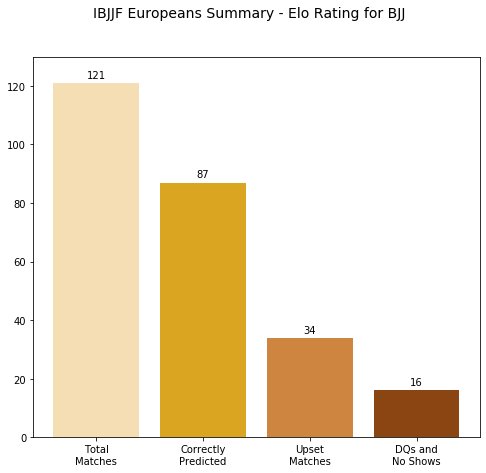

In [168]:
# fig = plt.figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(8,7))
x = np.arange(4)
fighters = [121, 87, 34, 16]
my_colors = ['wheat','goldenrod','peru','saddlebrown'] #'lemonchiffon',
rects1 = plt.bar(x, fighters, color=my_colors)
plt.xticks(x, ('Total\nMatches', 'Correctly\nPredicted', 'Upset\nMatches',  
               'DQs and\nNo Shows',))

ax.set_ylim((0, 130))
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
fig.suptitle('IBJJF Europeans Summary - Elo Rating for BJJ', fontsize=14)

plt.show()
fig.savefig(path + 'summary of europeans data.png')

In [172]:
acc.Correctly_Predict.fillna('upset', inplace=True)

In [173]:
acc.Correctly_Predict.value_counts()

correct    87
upset      34
-          16
Name: Correctly_Predict, dtype: int64

In [182]:
upssets = acc[acc.Correctly_Predict == 'upset']
upssets['Rating_Dif'] = abs(upssets.Fighter_Rating - upssets.Opponent_Rating)
upssets.sort_values(by=['Rating_Dif'], ascending=False)

,Tournament,Rank,Gym,Opponent Rank,Opponent Gym,Weight,Fighter,Opponent,Loser,Fighter_Rating,Opponent_Rating,Rating_Dif,Fighter_1_Win_Prob,Opponent_2_Win_Prob,Fighter_1_Result,Fighter_2_Result,Fighter_1_Prediction,Fighter_2_Prediction,Correctly_Predict,Unnamed: 19
102,European IBJJF Jiu-Jitsu Championship 2020,1,Zenith BJJ,3.0,GF Team,Super Heavy,Fellipe Andrew Leandro Silva,Patrick Pontes Moura Santos Gaudio,Fellipe Andrew Leandro Silva,1650.154271,1488.489912,161.664359,0.717200,0.282800,loser,NaN,NaN,loser,upset,NaN
91,European IBJJF Jiu-Jitsu Championship 2020,3,CheckMat,1.0,Legion American Jiu-Jitsu,Heavy,Adam Wardzinski,Keenan Kai-James Cornelius,Adam Wardzinski,1652.656853,1500.000000,152.656853,0.706566,0.293434,loser,NaN,NaN,loser,upset,NaN
22,European IBJJF Jiu-Jitsu Championship 2020,3,Brazilian Top Team,19.0,ZR Team Association,Feather,Leonardo Fernandes Saggioro,João Gabriel Batista de Sousa,João Gabriel Batista de Sousa,1497.714418,1618.303637,120.589219,0.333107,0.666893,NaN,loser,loser,NaN,upset,NaN
67,European IBJJF Jiu-Jitsu Championship 2020,7,Alexandre Machado Association - AMA Jiu-Jitsu ...,2.0,CheckMat,Medium Heavy,Bruno Filipe Santos Lima,Gabriel Salles Muniz Almeida,Gabriel Salles Muniz Almeida,1501.821906,1594.591871,92.769965,0.369578,0.630422,NaN,loser,loser,NaN,upset,NaN
14,European IBJJF Jiu-Jitsu Championship 2020,1,Brasa CTA,7.0,Cicero Costha Europe,Light Feather,Michael Musumeci Jr.,Francisco Jonas Borges Andrade,Francisco Jonas Borges Andrade,1500.000000,1581.899467,81.899467,0.384273,0.615727,NaN,loser,loser,NaN,upset,NaN
57,European IBJJF Jiu-Jitsu Championship 2020,3,Atos Jiu-Jitsu,7.0,Focus Jiu-Jitsu,Middle,Alexandre Joaquim de Jesus,Pedro Alves Douteiro Cranfield Ramalho,Alexandre Joaquim de Jesus,1574.328001,1500.000000,74.328001,0.605364,0.394636,loser,NaN,NaN,loser,upset,NaN
50,European IBJJF Jiu-Jitsu Championship 2020,5,Brasa CTA,9.0,Cicero Costha Internacional,Light,Léon Taffa Loic Larman,Natan Chueng Freitas,Natan Chueng Freitas,1492.042980,1560.447542,68.404562,0.402810,0.597190,NaN,loser,loser,NaN,upset,NaN
5,European IBJJF Jiu-Jitsu Championship 2020,3,Brasa CTA,2.0,Atos Jiu-Jitsu,Rooster,Tomoyuki Hashimoto,Cleber de Sousa Fernandes,Cleber de Sousa Fernandes,1526.536558,1588.228744,61.692186,0.412139,0.587861,NaN,loser,loser,NaN,upset,NaN
127,European IBJJF Jiu-Jitsu Championship 2020,7,GF Team,11.0,Atos Jiu-Jitsu,Open Class,Patrick Pontes Moura Santos Gaudio,Rafael Vasconcelos de Lima,Rafael Vasconcelos de Lima,1467.900807,1513.950656,46.049849,0.434114,0.565886,NaN,loser,loser,NaN,upset,NaN
38,European IBJJF Jiu-Jitsu Championship 2020,8,Cicero Costha Europe,2.0,Nova União,Light,Italo Moura de Azevedo,Luan de Carvalho Alves,Italo Moura de Azevedo,1538.071787,1500.000000,38.071787,0.554571,0.445429,loser,NaN,NaN,loser,upset,NaN


#### Compare to IBJJF Seeding

In [183]:
acc['Opponent Rank'].isnull().sum()

1

In [184]:
acc.Rank=acc.Rank.astype(int)
acc['Opponent Rank'].fillna(0, inplace=True)
acc['Opponent Rank']=acc['Opponent Rank'].astype(int)

In [185]:
acc['Fighter_1_Result'].isnull().sum()

62

In [186]:
acc2 = acc[acc['Fighter_1_Result'] =="loser"]
acc2['Rank_Difference_IBJJF'] = acc2.apply(lambda x : 'Upset' if x['Rank'] <= x['Opponent Rank'] else "Victory", axis=1)

acc3 = acc[acc['Fighter_2_Result'] =="loser"]
acc3['Rank_Difference_IBJJF'] = acc3.apply(lambda x : 'Upset' if x['Rank'] >= x['Opponent Rank'] else "Victory", axis=1)

In [187]:
acc4 = pd.concat([acc2, acc3])
acc4['Rank_Difference_IBJJF'].value_counts()

Victory    87
Upset      50
Name: Rank_Difference_IBJJF, dtype: int64

In [188]:
total_ibjjf = 87+50
total_ibjjf

137

In [189]:
accuracy_ibjjf = 87/total_ibjjf
accuracy_ibjjf

0.635036496350365

In [190]:
acc4

,Tournament,Rank,Gym,Opponent Rank,Opponent Gym,Weight,Fighter,Opponent,Loser,Fighter_Rating,...,Rating_Dif,Fighter_1_Win_Prob,Opponent_2_Win_Prob,Fighter_1_Result,Fighter_2_Result,Fighter_1_Prediction,Fighter_2_Prediction,Correctly_Predict,Unnamed: 19,Rank_Difference_IBJJF
0,European IBJJF Jiu-Jitsu Championship 2020,6,Carlson Gracie Team,4,Tri-Force Jiu-Jitsu Academy,Rooster,Juan Lopes da Silva,Koji Shibamoto,Juan Lopes da Silva,1492.978764,...,6.753398,0.509718,0.490282,loser,NaN,NaN,loser,-,no show,Victory
1,European IBJJF Jiu-Jitsu Championship 2020,5,Tri-Force Jiu-Jitsu Academy,3,Brasa CTA,Rooster,Nobuhiro Sawada,Tomoyuki Hashimoto,Nobuhiro Sawada,1412.561213,...,113.975345,0.341617,0.658383,loser,NaN,loser,NaN,correct,NaN,Victory
2,European IBJJF Jiu-Jitsu Championship 2020,1,Alliance,9,Cicero Costha Internacional,Rooster,Bruno da Silva Malfacine,Thalison Vitorino Soares,Bruno da Silva Malfacine,1497.125950,...,31.205616,0.455212,0.544788,loser,NaN,loser,NaN,correct,NaN,Upset
3,European IBJJF Jiu-Jitsu Championship 2020,7,Gracie Barra,2,Atos Jiu-Jitsu,Rooster,Lucas Ramos Gonçalves,Cleber de Sousa Fernandes,Lucas Ramos Gonçalves,1489.502843,...,98.725901,0.361626,0.638374,loser,NaN,loser,NaN,-,no show,Victory
4,European IBJJF Jiu-Jitsu Championship 2020,4,Tri-Force Jiu-Jitsu Academy,9,Cicero Costha Internacional,Rooster,Koji Shibamoto,Thalison Vitorino Soares,Koji Shibamoto,1486.225366,...,42.106200,0.439699,0.560301,loser,NaN,loser,NaN,correct,NaN,Upset
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,European IBJJF Jiu-Jitsu Championship 2020,16,R1NG BJJ,24,Luiz Palhares Jiu Jitsu,Open Class,Gabriel Arantes Volante,Deandre Villarama Corbe,Deandre Villarama Corbe,1505.309216,...,5.309216,0.507640,0.492360,NaN,loser,NaN,loser,-,no show,Victory
125,European IBJJF Jiu-Jitsu Championship 2020,6,Brasa CTA,9,GF Team,Open Class,Michael Musumeci Jr.,Seif-Eddine Houmine,Seif-Eddine Houmine,1500.000000,...,9.984308,0.485635,0.514365,NaN,loser,loser,NaN,upset,NaN,Victory
127,European IBJJF Jiu-Jitsu Championship 2020,7,GF Team,11,Atos Jiu-Jitsu,Open Class,Patrick Pontes Moura Santos Gaudio,Rafael Vasconcelos de Lima,Rafael Vasconcelos de Lima,1467.900807,...,46.049848,0.434114,0.565886,NaN,loser,loser,NaN,upset,NaN,Victory
134,European IBJJF Jiu-Jitsu Championship 2020,2,Zenith BJJ,18,Gracie Barra,Open Class,Fellipe Andrew Leandro Silva,Fellipe Ubaiz Trovo,Fellipe Ubaiz Trovo,1592.003543,...,60.128676,0.585678,0.414322,NaN,loser,NaN,loser,correct,NaN,Victory


In [191]:
acc4.to_csv('Final_Euros_Scoring_withIBJJF.csv', index=False)

#### New Elo Ratings After Europeans

In [267]:
df_all.head(3)

,Weight,Bracket Title,Rank,Fighter,Loser,Opponent,Opponent Rank,Tournament
53,Open Class,Bracket 1/2,6.0,Michael Musumeci Jr.,Jacopo Pasquini,Jacopo Pasquini,26,European IBJJF Jiu-Jitsu Championship 2020
54,Open Class,Bracket 1/2,26.0,Jacopo Pasquini,Jacopo Pasquini,Michael Musumeci Jr.,6,European IBJJF Jiu-Jitsu Championship 2020
55,Open Class,Bracket 2/2,7.0,Patrick Pontes Moura Santos Gaudio,Felipe Figueiredo Mauricio,Felipe Figueiredo Mauricio,25,European IBJJF Jiu-Jitsu Championship 2020


In [268]:
# mapping all weight classes
rooster = df2.loc[df2.weight == 'rooster']
light_feather = df2.loc[df2.weight == 'light_feather']
feather = df2.loc[df2.weight == 'feather']
light = df2.loc[df2.weight == 'light']
middle = df2.loc[df2.weight == 'middle']
medium_heavy = df2.loc[df2.weight == 'medium_heavy']
heavy = df2.loc[df2.weight == 'heavy']
super_heavy = df2.loc[df2.weight == 'super_heavy']
ultra_heavy = df2.loc[df2.weight == 'ultra_heavy']
ABS = df2.loc[df2.weight == 'ABS']

eu_rooster = df_all.loc[df_all.Weight == 'Rooster']
eu_light_feather = df_all.loc[df_all.Weight == 'Light Feather']
eu_feather = df_all.loc[df_all.Weight == 'Feather']
eu_light = df_all.loc[df_all.Weight == 'Light']
eu_middle = df_all.loc[df_all.Weight == 'Middle']
eu_medium_heavy = df_all.loc[df_all.Weight == 'Medium Heavy']
eu_heavy = df_all.loc[df_all.Weight == 'Heavy']
eu_super_heavy = df_all.loc[df_all.Weight == 'Super Heavy']
eu_ultra_heavy = df_all.loc[df_all.Weight == 'Ultra Heavy']
eu_open = df_all.loc[df_all.Weight == 'Open Class']

fighter_dict1 = dict(zip(rooster.Fighter_Names, rooster.rating))
eu_rooster['Fighter_Rating'] = eu_rooster['Fighter'].map(fighter_dict1)
eu_rooster['Opponent_Rating'] = eu_rooster['Opponent'].map(fighter_dict1)

fighter_dict2 = dict(zip(light_feather.Fighter_Names, light_feather.rating))
eu_light_feather['Fighter_Rating'] = eu_light_feather['Fighter'].map(fighter_dict2)
eu_light_feather['Opponent_Rating'] = eu_light_feather['Opponent'].map(fighter_dict2)

fighter_dict3 = dict(zip(feather.Fighter_Names, feather.rating))
eu_feather['Fighter_Rating'] = eu_feather['Fighter'].map(fighter_dict3)
eu_feather['Opponent_Rating'] = eu_feather['Opponent'].map(fighter_dict3)

fighter_dict4 = dict(zip(light.Fighter_Names, light.rating))
eu_light['Fighter_Rating'] = eu_light['Fighter'].map(fighter_dict4)
eu_light['Opponent_Rating'] = eu_light['Opponent'].map(fighter_dict4)

fighter_dict5 = dict(zip(middle.Fighter_Names, middle.rating))
eu_middle['Fighter_Rating'] = eu_middle['Fighter'].map(fighter_dict5)
eu_middle['Opponent_Rating'] = eu_middle['Opponent'].map(fighter_dict5)

fighter_dict6 = dict(zip(medium_heavy.Fighter_Names, medium_heavy.rating))
eu_medium_heavy['Fighter_Rating'] = eu_medium_heavy['Fighter'].map(fighter_dict6)
eu_medium_heavy['Opponent_Rating'] = eu_medium_heavy['Opponent'].map(fighter_dict6)

fighter_dict7 = dict(zip(heavy.Fighter_Names, heavy.rating))
eu_heavy['Fighter_Rating'] = eu_heavy['Fighter'].map(fighter_dict7)
eu_heavy['Opponent_Rating'] = eu_heavy['Opponent'].map(fighter_dict7)

fighter_dict8 = dict(zip(super_heavy.Fighter_Names, super_heavy.rating))
eu_super_heavy['Fighter_Rating'] = eu_super_heavy['Fighter'].map(fighter_dict8)
eu_super_heavy['Opponent_Rating'] = eu_super_heavy['Opponent'].map(fighter_dict8)

fighter_dict9 = dict(zip(ultra_heavy.Fighter_Names, ultra_heavy.rating))
eu_ultra_heavy['Fighter_Rating'] = eu_ultra_heavy['Fighter'].map(fighter_dict9)
eu_ultra_heavy['Opponent_Rating'] = eu_ultra_heavy['Opponent'].map(fighter_dict9)

fighter_dict10 = dict(zip(ABS.Fighter_Names, ABS.rating))
eu_open['Fighter_Rating'] = eu_open['Fighter'].map(fighter_dict10)
eu_open['Opponent_Rating'] = eu_open['Opponent'].map(fighter_dict10)


df_all = pd.concat([eu_rooster,eu_light_feather,eu_feather,eu_light,eu_middle,
                eu_medium_heavy,eu_heavy,eu_super_heavy,eu_ultra_heavy,eu_open])
df_all['Rating_Dif'] = abs(df_all.Fighter_Rating - df_all.Opponent_Rating)
print(df_all.shape)
df_all.head(3)

(274, 11)


,Weight,Bracket Title,Rank,Fighter,Loser,Opponent,Opponent Rank,Tournament,Fighter_Rating,Opponent_Rating,Rating_Dif
61,Rooster,Bracket 1/1,3.0,Tomoyuki Hashimoto,Nobuhiro Sawada,Nobuhiro Sawada,5,European IBJJF Jiu-Jitsu Championship 2020,1526.536558,1412.561213,113.975345
62,Rooster,Bracket 1/1,4.0,Koji Shibamoto,Juan Lopes da Silva,Juan Lopes da Silva,6,European IBJJF Jiu-Jitsu Championship 2020,1486.225366,1492.978764,6.753398
63,Rooster,Bracket 1/1,6.0,Juan Lopes da Silva,Juan Lopes da Silva,Koji Shibamoto,4,European IBJJF Jiu-Jitsu Championship 2020,1492.978764,1486.225366,6.753398


In [269]:
df_all.Fighter_Rating.isnull().sum()

34

In [270]:
df_all.Opponent_Rating.isnull().sum()

34

In [271]:
df_all['Fighter_1_Result'] = df_all.apply(lambda x : 'loser' if x['Fighter'] == x['Loser'] else "", axis=1)
df_all['Fighter_2_Result'] = df_all.apply(lambda x : 'loser' if x['Opponent'] == x['Loser'] else "", axis=1)

In [273]:
df_all.loc[~df_all['Fighter_1_Result'].isnull(), 'Win_1'] = 1
df_all.loc[df_all['Fighter_1_Result'] == 'loser', 'Win_1'] = 0
df_all.loc[~df_all['Fighter_2_Result'].isnull(), 'Win_2'] = 1
df_all.loc[df_all['Fighter_2_Result'] == 'loser', 'Win_2'] = 0
# df.Win=df.Win.astype(float)

In [274]:
df_all.Win_1.value_counts()

0.0    143
1.0    131
Name: Win_1, dtype: int64

In [275]:
df_all

,Weight,Bracket Title,Rank,Fighter,Loser,Opponent,Opponent Rank,Tournament,Fighter_Rating,Opponent_Rating,Rating_Dif,Fighter_1_Result,Fighter_2_Result,Win_1,Win_2
61,Rooster,Bracket 1/1,3.0,Tomoyuki Hashimoto,Nobuhiro Sawada,Nobuhiro Sawada,5,European IBJJF Jiu-Jitsu Championship 2020,1526.536558,1412.561213,113.975345,,loser,1.0,0.0
62,Rooster,Bracket 1/1,4.0,Koji Shibamoto,Juan Lopes da Silva,Juan Lopes da Silva,6,European IBJJF Jiu-Jitsu Championship 2020,1486.225366,1492.978764,6.753398,,loser,1.0,0.0
63,Rooster,Bracket 1/1,6.0,Juan Lopes da Silva,Juan Lopes da Silva,Koji Shibamoto,4,European IBJJF Jiu-Jitsu Championship 2020,1492.978764,1486.225366,6.753398,loser,,0.0,1.0
64,Rooster,Bracket 1/1,5.0,Nobuhiro Sawada,Nobuhiro Sawada,Tomoyuki Hashimoto,3,European IBJJF Jiu-Jitsu Championship 2020,1412.561213,1526.536558,113.975345,loser,,0.0,1.0
67,Rooster,Bracket 1/1,1.0,Bruno da Silva Malfacine,Bruno da Silva Malfacine,Thalison Vitorino Soares,9,European IBJJF Jiu-Jitsu Championship 2020,1497.125950,1528.331566,31.205616,loser,,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Open Class,Bracket 2/2,2.0,Fellipe Andrew Leandro Silva,Fellipe Ubaiz Trovo,Fellipe Ubaiz Trovo,18,European IBJJF Jiu-Jitsu Championship 2020,1592.003543,1531.874867,60.128676,,loser,1.0,0.0
156,Open Class,Bracket 2/2,18.0,Fellipe Ubaiz Trovo,Fellipe Ubaiz Trovo,Fellipe Andrew Leandro Silva,2,European IBJJF Jiu-Jitsu Championship 2020,1531.874867,1592.003543,60.128676,loser,,0.0,1.0
158,Open Class,Bracket 1/2,1.0,Keenan Kai-James Cornelius,Mahamed Aly Santos da Silva,Mahamed Aly Santos da Silva,4,European IBJJF Jiu-Jitsu Championship 2020,1601.458224,1505.936230,95.521994,,loser,1.0,0.0
227,Open Class,Finals,1.0,Keenan Kai-James Cornelius,Keenan Kai-James Cornelius,Fellipe Andrew Leandro Silva,2,European IBJJF Jiu-Jitsu Championship 2020,1601.458224,1592.003543,9.454681,loser,,0.0,1.0


Manuualy Add

Rn = Ro + K × (W - We)

Rn is the new rating, Ro is the old (pre-match) rating.

K is the weight constant for the tournament played:

    60 for World Cup finals;
    50 for continental championship finals and major intercontinental tournaments;
    40 for World Cup and continental qualifiers and major tournaments;
    30 for all other tournaments;
    20 for friendly matches.

K is then adjusted for the goal difference in the game. It is increased by half if a game is won by two goals, by 3/4 if a game is won by three goals, and by 3/4 + (N-3)/8 if the game is won by four or more goals, where N is the goal difference.

W is the result of the game (1 for a win, 0.5 for a draw, and 0 for a loss).

We is the expected result (win expectancy), either from the chart or the following formula:
We = 1 / (10(-dr/400) + 1)

dr equals the difference in ratings plus 100 points for a team playing at home. 

- http://www.eloratings.net/about

In [256]:
len(df.Win_1)

137

In [258]:
df['New_Elo_Fighter_1'] = df.apply(lambda x: x.Fighter_Rating + 40 * (x.Win_1 - x.Fighter_1_Win_Prob),axis=1)
df['New_Elo_Fighter_2'] = df.apply(lambda x: x.Opponent_Rating + 40 * (x.Win_2 - x.Opponent_2_Win_Prob),axis=1)
df['Fighter_1_Change'] = df.New_Elo_Fighter_1 - df.Fighter_Rating
df['Fighter_2_Change'] = df.New_Elo_Fighter_2 - df.Opponent_Rating

In [259]:
df.sort_values(['Fighter', 'Fight Number'])

,Tournament,Fight Number,Rank,Gym,Opponent Rank,Opponent Gym,Weight,Fighter,Opponent,Loser,...,Fighter_2_Result,Fighter_1_Prediction,Fighter_2_Prediction,Correctly_Predict,Win_1,Win_2,New_Elo_Fighter_1,New_Elo_Fighter_2,Fighter_1_Change,Fighter_2_Change
112,European IBJJF Jiu-Jitsu Championship 2020,18,3,CheckMat,9,R1NG BJJ,Heavy,Adam Wardzinski,Gabriel Arantes Volante,Gabriel Arantes Volante,...,loser,,loser,correct,1.0,0.0,1664.339567,1487.170974,11.682713,-11.682713
124,European IBJJF Jiu-Jitsu Championship 2020,24,3,CheckMat,2,Alliance,Heavy,Adam Wardzinski,Dimitrius Soares Souza,Dimitrius Soares Souza,...,loser,,loser,correct,1.0,0.0,1666.677970,1531.500584,14.021117,-14.021117
132,European IBJJF Jiu-Jitsu Championship 2020,37,3,CheckMat,1,Legion American Jiu-Jitsu,Heavy,Adam Wardzinski,Keenan Kai-James Cornelius,Adam Wardzinski,...,,,loser,,0.0,1.0,1624.394217,1528.262637,-28.262637,28.262637
170,European IBJJF Jiu-Jitsu Championship 2020,63,8,Alliance,13,CheckMat,Middle,Alexandre Cavalieri Gomes da Silva,Jose Mathias Macedo de Lira Luna,Alexandre Cavalieri Gomes da Silva,...,,,loser,,0.0,1.0,1472.777834,1512.502315,-20.017924,20.017924
153,European IBJJF Jiu-Jitsu Championship 2020,58,3,Carlson Gracie Team,16,Atos Jiu-Jitsu,Light,Alexandre Faria Molinaro,Jonnatas Gracie Araujo da Silva,Alexandre Faria Molinaro,...,,,loser,,0.0,1.0,1539.973025,1530.392926,-23.194226,23.194226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,European IBJJF Jiu-Jitsu Championship 2020,62,1,KMR BJJ KIMURA,15,Gracie Barra,Middle,Tommy Lilleskog Langaker,Oliver Johnathon Lovell,Oliver Johnathon Lovell,...,loser,,loser,correct,1.0,0.0,1603.130473,1472.451851,14.285821,-14.285821
89,European IBJJF Jiu-Jitsu Championship 2020,9,3,Brasa CTA,2,Atos Jiu-Jitsu,Rooster,Tomoyuki Hashimoto,Cleber de Sousa Fernandes,Cleber de Sousa Fernandes,...,loser,loser,,,1.0,0.0,1550.050988,1564.714314,23.514429,-23.514429
133,European IBJJF Jiu-Jitsu Championship 2020,38,3,Brasa CTA,9,Cicero Costha Internacional,Rooster,Tomoyuki Hashimoto,Thalison Vitorino Soares,Thalison Vitorino Soares,...,loser,loser,,,1.0,0.0,1546.639886,1508.228238,20.103328,-20.103328
151,European IBJJF Jiu-Jitsu Championship 2020,56,1,GF Team,13,Cicero Costha Europe,Light,Vitor Henrique Silva Oliveira,Fabricio José Barbarotti,Fabricio José Barbarotti,...,loser,,loser,correct,1.0,0.0,1525.339567,1456.667871,18.140867,-18.140867


In [260]:
new_elo = df[['Fight Number','Weight','Fighter','Opponent','Loser','Fighter_Rating','Opponent_Rating','Fighter_1_Win_Prob',
              'Opponent_2_Win_Prob','Win_1','Win_2','New_Elo_Fighter_1','New_Elo_Fighter_2',
             'Fighter_1_Change','Fighter_2_Change']]

In [261]:
new_elo

,Fight Number,Weight,Fighter,Opponent,Loser,Fighter_Rating,Opponent_Rating,Fighter_1_Win_Prob,Opponent_2_Win_Prob,Win_1,Win_2,New_Elo_Fighter_1,New_Elo_Fighter_2,Fighter_1_Change,Fighter_2_Change
57,1,Rooster,Juan Lopes da Silva,Koji Shibamoto,Juan Lopes da Silva,1492.978764,1486.225366,0.509718,0.490282,0.0,1.0,1472.590056,1506.614074,-20.388708,20.388708
58,1,Rooster,Nobuhiro Sawada,Tomoyuki Hashimoto,Nobuhiro Sawada,1412.561213,1526.536558,0.341617,0.658383,0.0,1.0,1398.896517,1540.201254,-13.664696,13.664696
60,2,Rooster,Bruno da Silva Malfacine,Thalison Vitorino Soares,Bruno da Silva Malfacine,1497.125950,1528.331566,0.455212,0.544788,0.0,1.0,1478.917475,1546.540041,-18.208475,18.208475
79,6,Rooster,Lucas Ramos Gonçalves,Cleber de Sousa Fernandes,Lucas Ramos Gonçalves,1489.502843,1588.228744,0.361626,0.638374,0.0,1.0,1475.037786,1602.693801,-14.465057,14.465057
88,9,Rooster,Koji Shibamoto,Thalison Vitorino Soares,Koji Shibamoto,1486.225366,1528.331566,0.439699,0.560301,0.0,1.0,1468.637397,1545.919536,-17.587970,17.587970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,11,Open Class,Patrick Pontes Moura Santos Gaudio,Fellipe Andrew Leandro Silva,Patrick Pontes Moura Santos Gaudio,1467.900807,1592.003543,0.328629,0.671371,0.0,1.0,1454.755650,1605.148700,-13.145157,13.145157
97,11,Open Class,Michael Musumeci Jr.,Mahamed Aly Santos da Silva,Michael Musumeci Jr.,1500.000000,1505.936230,0.491458,0.508542,0.0,1.0,1480.341684,1525.594546,-19.658316,19.658316
102,14,Open Class,Fellipe Andrew Leandro Silva,Fellipe Ubaiz Trovo,Fellipe Ubaiz Trovo,1592.003543,1531.874867,0.585678,0.414322,1.0,0.0,1608.576406,1515.302005,16.572863,-16.572863
104,14,Open Class,Keenan Kai-James Cornelius,Mahamed Aly Santos da Silva,Mahamed Aly Santos da Silva,1601.458224,1505.936230,0.634105,0.365895,1.0,0.0,1616.094018,1491.300436,14.635794,-14.635794


In [220]:
new_elo.sort_values(by='Fighter_1_Change', ascending=False)

,Weight,Fighter,Opponent,Loser,Fighter_Rating,Opponent_Rating,Fighter_1_Win_Prob,Opponent_2_Win_Prob,Win_1,Win_2,New_Elo_Fighter_1,New_Elo_Fighter_2,Fighter_1_Change,Fighter_2_Change
95,Feather,Leonardo Fernandes Saggioro,João Gabriel Batista de Sousa,João Gabriel Batista de Sousa,1497.714418,1618.303637,0.333107,0.666893,1.0,0.0,1524.390151,1591.627904,26.675733,-26.675733
99,Medium Heavy,Bruno Filipe Santos Lima,Gabriel Salles Muniz Almeida,Gabriel Salles Muniz Almeida,1501.821906,1594.591871,0.369578,0.630422,1.0,0.0,1527.038779,1569.374998,25.216873,-25.216873
134,Light Feather,Michael Musumeci Jr.,Francisco Jonas Borges Andrade,Francisco Jonas Borges Andrade,1500.000000,1581.899467,0.384273,0.615727,1.0,0.0,1524.629087,1557.270380,24.629087,-24.629087
158,Light,Léon Taffa Loic Larman,Natan Chueng Freitas,Natan Chueng Freitas,1492.042980,1560.447542,0.402810,0.597190,1.0,0.0,1515.930561,1536.559962,23.887581,-23.887581
89,Rooster,Tomoyuki Hashimoto,Cleber de Sousa Fernandes,Cleber de Sousa Fernandes,1526.536558,1588.228744,0.412139,0.587861,1.0,0.0,1550.050988,1564.714314,23.514429,-23.514429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,Middle,Alexandre Joaquim de Jesus,Pedro Alves Douteiro Cranfield Ramalho,Alexandre Joaquim de Jesus,1574.328001,1500.000000,0.605364,0.394636,0.0,1.0,1550.113438,1524.214562,-24.214562,24.214562
132,Heavy,Adam Wardzinski,Keenan Kai-James Cornelius,Adam Wardzinski,1652.656853,1500.000000,0.706566,0.293434,0.0,1.0,1624.394217,1528.262637,-28.262637,28.262637
131,Super Heavy,Fellipe Andrew Leandro Silva,Patrick Pontes Moura Santos Gaudio,Fellipe Andrew Leandro Silva,1650.154271,1488.489912,0.717200,0.282800,0.0,1.0,1621.466271,1517.177913,-28.688000,28.688000
183,Medium Heavy,Rudson Mateus Sarmento Teles,Filipe Pimentel Pinheiro,Rudson Mateus Sarmento Teles,1658.462430,1493.831824,0.720650,0.279350,0.0,1.0,1629.636415,1522.657839,-28.826015,28.826015


Use Py File to Update All

In [277]:
rooster = df_all[df_all.Weight == 'Rooster']
rooster.sort_values(by='Fighter')

,Weight,Bracket Title,Rank,Fighter,Loser,Opponent,Opponent Rank,Tournament,Fighter_Rating,Opponent_Rating,Rating_Dif,Fighter_1_Result,Fighter_2_Result,Win_1,Win_2
67,Rooster,Bracket 1/1,1.0,Bruno da Silva Malfacine,Bruno da Silva Malfacine,Thalison Vitorino Soares,9,European IBJJF Jiu-Jitsu Championship 2020,1497.125950,1528.331566,31.205616,loser,,0.0,1.0
103,Rooster,Bracket 1/1,2.0,Cleber de Sousa Fernandes,Lucas Ramos Gonçalves,Lucas Ramos Gonçalves,7,European IBJJF Jiu-Jitsu Championship 2020,1588.228744,NaN,NaN,,loser,1.0,0.0
124,Rooster,Bracket 1/1,2.0,Cleber de Sousa Fernandes,Cleber de Sousa Fernandes,Tomoyuki Hashimoto,3,European IBJJF Jiu-Jitsu Championship 2020,1588.228744,1526.536558,61.692185,loser,,0.0,1.0
63,Rooster,Bracket 1/1,6.0,Juan Lopes da Silva,Juan Lopes da Silva,Koji Shibamoto,4,European IBJJF Jiu-Jitsu Championship 2020,1492.978764,1486.225366,6.753398,loser,,0.0,1.0
62,Rooster,Bracket 1/1,4.0,Koji Shibamoto,Juan Lopes da Silva,Juan Lopes da Silva,6,European IBJJF Jiu-Jitsu Championship 2020,1486.225366,1492.978764,6.753398,,loser,1.0,0.0
125,Rooster,Bracket 1/1,4.0,Koji Shibamoto,Koji Shibamoto,Thalison Vitorino Soares,9,European IBJJF Jiu-Jitsu Championship 2020,1486.225366,1528.331566,42.106200,loser,,0.0,1.0
232,Rooster,Bracket 1/1,8.0,Kristian R. Woodmansee,Kristian R. Woodmansee,Thalison Vitorino Soares,9,European IBJJF Jiu-Jitsu Championship 2020,1476.500011,1528.331566,51.831555,loser,,0.0,1.0
104,Rooster,Bracket 1/1,7.0,Lucas Ramos Gonçalves,Lucas Ramos Gonçalves,Cleber de Sousa Fernandes,2,European IBJJF Jiu-Jitsu Championship 2020,NaN,1588.228744,NaN,loser,,0.0,1.0
64,Rooster,Bracket 1/1,5.0,Nobuhiro Sawada,Nobuhiro Sawada,Tomoyuki Hashimoto,3,European IBJJF Jiu-Jitsu Championship 2020,1412.561213,1526.536558,113.975345,loser,,0.0,1.0
72,Rooster,Bracket 1/1,9.0,Thalison Vitorino Soares,Bruno da Silva Malfacine,Bruno da Silva Malfacine,1,European IBJJF Jiu-Jitsu Championship 2020,1528.331566,1497.125950,31.205616,,loser,1.0,0.0


In [278]:
df_all.sort_values(by='Fighter')

,Weight,Bracket Title,Rank,Fighter,Loser,Opponent,Opponent Rank,Tournament,Fighter_Rating,Opponent_Rating,Rating_Dif,Fighter_1_Result,Fighter_2_Result,Win_1,Win_2
211,Heavy,Bracket 1/1,3.0,Adam Wardzinski,Adam Wardzinski,Keenan Kai-James Cornelius,1,European IBJJF Jiu-Jitsu Championship 2020,1652.656853,1500.000000,152.656853,loser,,0.0,1.0
197,Heavy,Bracket 1/1,3.0,Adam Wardzinski,Dimitrius Soares Souza,Dimitrius Soares Souza,2,European IBJJF Jiu-Jitsu Championship 2020,1652.656853,1545.521701,107.135153,,loser,1.0,0.0
173,Heavy,Bracket 1/1,3.0,Adam Wardzinski,Gabriel Arantes Volante,Gabriel Arantes Volante,9,European IBJJF Jiu-Jitsu Championship 2020,1652.656853,1498.853688,153.803166,,loser,1.0,0.0
306,Medium Heavy,Bracket 1/2,5.0,Alec Jerrod Baulding,Alec Jerrod Baulding,Santeri Lilius,10,European IBJJF Jiu-Jitsu Championship 2020,1465.260706,1504.381390,39.120685,loser,,0.0,1.0
235,Light Feather,Bracket 1/1,11.0,Alejandro Carreras Lecoq,Alejandro Carreras Lecoq,Carlos Alberto Oliveira da Silva,5,European IBJJF Jiu-Jitsu Championship 2020,NaN,1512.801300,NaN,loser,,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Light,Bracket 1/1,1.0,Vitor Henrique Silva Oliveira,Pedro Henrique Segura Veras,Pedro Henrique Segura Veras,14,European IBJJF Jiu-Jitsu Championship 2020,1507.198700,1512.458378,5.259678,,loser,1.0,0.0
245,Light,Bracket 1/1,1.0,Vitor Henrique Silva Oliveira,Fabricio José Barbarotti,Fabricio José Barbarotti,13,European IBJJF Jiu-Jitsu Championship 2020,1507.198700,NaN,NaN,,loser,1.0,0.0
220,Light,Bracket 1/1,1.0,Vitor Henrique Silva Oliveira,Vitor Henrique Silva Oliveira,Jonnatas Gracie Araujo da Silva,16,European IBJJF Jiu-Jitsu Championship 2020,1507.198700,NaN,NaN,loser,,0.0,1.0
230,Light Feather,Bracket 1/1,10.0,Wesley Souza Santos,Wesley Souza Santos,Francisco Jonas Borges Andrade,7,European IBJJF Jiu-Jitsu Championship 2020,1492.941455,1581.899467,88.958012,loser,,0.0,1.0


In [282]:
df_all.Fighter.isnull().sum()

0

In [283]:
df_all.Opponent.isnull().sum()

0

In [284]:
df_all.Win_1.isnull().sum()

0

In [291]:
df_all.drop([198], inplace=True) #drop unknown fighter

In [308]:
df_all.Fighter_Rating.fillna(1500, inplace=True)
df_all.Opponent_Rating.fillna(1500, inplace=True)

In [309]:
df_all.Fighter_Rating.isnull().sum()

0

No Shows List:

Rooster
- Lucas Ramos Gonçalves
- Juan Lopes da Silva

Light Feather
- Hiago George Santos Si

Light
- Alexandre Faria Molina

Middle
- Bradley Hill (showed up to open)

Mid Heavy
- Henrique Riedlinger Mo
- Yan Cabral de Almeida
- Rudson Mateus Sarmen

Heavy
- Philippe Basil Pomaski

Super
- Helton Jose Mendes da
- Lukasz Gustaw Michal (showed up to open)
- Stanislav Varshavskiy

Ultra
- Renan Marcel Rodrigue

Open
- Deandre Villarama Co

DQs:
- Marcus John Phelan
- Thalison Soares
- Max Leon Bickerton

In [336]:
df_all[df_all['Fighter'].str.contains("Lukasz")]

,Weight,Bracket Title,Rank,Fighter,Loser,Opponent,Opponent Rank,Tournament,Fighter_Rating,Opponent_Rating,Rating_Dif,Fighter_1_Result,Fighter_2_Result,Win_1,Win_2
193,Super Heavy,Bracket 1/1,6.0,Lukasz Gustaw Michalec,Helton Jose Mendes da Silva Junior,Helton Jose Mendes da Silva Junior,2,European IBJJF Jiu-Jitsu Championship 2020,1512.8013,1518.008981,5.207681,,loser,1.0,0.0
77,Open Class,Bracket 1/2,17.0,Lukasz Gustaw Michalec,Lukasz Gustaw Michalec,Seif-Eddine Houmine,9,European IBJJF Jiu-Jitsu Championship 2020,1500.0000,1509.984308,NaN,loser,,0.0,1.0


In [337]:
df_all.drop([104,63,118,254,295,316,300,314,312,
            194,193,175,326,101], inplace=True) # Remove no shows, so ranking doesn't go down

In [338]:
df_all.to_csv('df_all.csv', index=False)

In [340]:
euros_rating = pd.read_csv('euros_rating_02022020.csv')
print(len(euros_rating))

120


In [341]:
euros_rating

,fighter,rating
0,Vitor Henrique Silva Oliveira,1573.702063
1,Max Leonard Lindblad,1496.933702
2,Sam Matthew Mc Nally,1461.077740
3,Deandre Villarama Corbe,1485.007084
4,Sebastian Brosché,1462.590616
5,Jackson Sousa dos Santos,1514.657339
6,Espen Mathiesen,1466.928156
7,Nobuhiro Sawada,1465.094542
8,Sean Coates,1467.386340
9,John Lenno Melo Dantas,1460.805523


In [342]:
df_all.head(3)

,Weight,Bracket Title,Rank,Fighter,Loser,Opponent,Opponent Rank,Tournament,Fighter_Rating,Opponent_Rating,Rating_Dif,Fighter_1_Result,Fighter_2_Result,Win_1,Win_2
61,Rooster,Bracket 1/1,3.0,Tomoyuki Hashimoto,Nobuhiro Sawada,Nobuhiro Sawada,5,European IBJJF Jiu-Jitsu Championship 2020,1526.536558,1412.561213,113.975345,,loser,1.0,0.0
62,Rooster,Bracket 1/1,4.0,Koji Shibamoto,Juan Lopes da Silva,Juan Lopes da Silva,6,European IBJJF Jiu-Jitsu Championship 2020,1486.225366,1492.978764,6.753398,,loser,1.0,0.0
64,Rooster,Bracket 1/1,5.0,Nobuhiro Sawada,Nobuhiro Sawada,Tomoyuki Hashimoto,3,European IBJJF Jiu-Jitsu Championship 2020,1412.561213,1526.536558,113.975345,loser,,0.0,1.0


In [343]:
df_new = df_all[['Weight','Fighter','Fighter_Rating']]

In [344]:
new_rating_dict = dict(zip(euros_rating.fighter, euros_rating.rating))
df_new['Euros_Rating'] = df_new['Fighter'].map(new_rating_dict)
print(len(df_new))
df_new.drop_duplicates(inplace=True)
print(len(df_new))
df_new['Rating_Change'] = df_new.Euros_Rating - df_new.Fighter_Rating

259
135


In [345]:
df_new.sort_values(['Rating_Change'])

,Weight,Fighter,Fighter_Rating,Euros_Rating,Rating_Change
173,Heavy,Adam Wardzinski,1652.656853,1543.198909,-109.457944
103,Rooster,Cleber de Sousa Fernandes,1588.228744,1483.165398,-105.063345
262,Light,Natan Chueng Freitas,1560.447542,1462.590616,-97.856926
145,Medium Heavy,Gabriel Salles Muniz Almeida,1594.591871,1498.293409,-96.298461
88,Feather,Alexssandro Pinto Sodré,1639.767632,1545.417169,-94.350462
85,Open Class,Guilherme Afonso Freire Themudo Jardim,1511.719527,1421.743555,-89.975972
87,Feather,Israel de Sousa Almeida,1581.172437,1497.086405,-84.086032
324,Heavy,Dominique L. Bell,1537.232316,1457.485338,-79.746978
90,Feather,Deandre Villarama Corbe,1564.717445,1485.007084,-79.710360
317,Heavy,Guilherme Afonso Freire Themudo Jardim,1500.000000,1421.743555,-78.256445


In [346]:
df_new.to_csv('euros_change_comparison.csv', index=False)

In [ ]:
# map these new results to the custom weights for 2020